## Manual

In [1]:
import requests
import shutil
from IPython.display import Image

In [2]:
rs = requests.session()
res = rs.get('https://fbfh.trade.gov.tw/fb/image.do', stream=True, verify=False)

f = open('check.png', 'wb')
shutil.copyfileobj(res.raw, f)
f.close()

C:\Users\khl\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


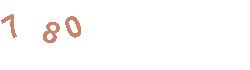

In [3]:
Image('check.png')

In [4]:
info ={
    'q_BanNo': '',
    'q_CName': '台北',
    'q_EName': '',
    'q_Boss': '',
    'q_ieType': 'E',
    'q_ccc': '',
    'cccText_C': '',
    'cccText_E': '',
    'q_GoodName': '',
    'verifyCode': '255'
}

res = rs.post('https://fbfh.trade.gov.tw/fb/web/queryBasicf.do', data=info, verify=False)

C:\Users\khl\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
print(res.text)

<!DOCTYPE html>
















	




<html lang="zh-Hant-TW">
<head>



<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>
<meta name="viewport" content="width=device-width, initial-scale=1.0" />
<title>出進口廠商登記系統</title>

<link rel="stylesheet" href="/fb/js/bootstrap-4.3.1-dist/css/bootstrap.min.css;jsessionid=8402BDDAE9D9A6A1109A2391F4BBCD81" type="text/css"/>
<link rel="stylesheet" href="/fb/js/default.css;jsessionid=8402BDDAE9D9A6A1109A2391F4BBCD81" type="text/css"/>
<link rel="stylesheet" href="/fb/js/bs-stepper.css;jsessionid=8402BDDAE9D9A6A1109A2391F4BBCD81" type="text/css"/>

<script type="text/javascript" src="/fb/js/jquery-2.2.4.min.js;jsessionid=8402BDDAE9D9A6A1109A2391F4BBCD81"></script>
<script type="text/javascript" src="/fb/js/bootstrap-4.3.1-dist/js/bootstrap.bundle.min.js;jsessionid=8402BDDAE9D9A6A1109A2391F4BBCD81"></script>
<script type="text/javascript" src="/fb/js/bootstrap-4.3.1-dist/js/bootbo

## Automatic - pytessaract

In [6]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\khl\AppData\Local\Programs\Tesseract-OCR\tesseract'

In [8]:
print(pytesseract.image_to_string(Image.open('test4.JPG'), lang='eng'))

9071



## Automatic - opencv + pytesseract (example1)

In [9]:
from PIL import Image
from PIL import ImageEnhance
import PIL.ImageOps
import pytesseract
import argparse
import cv2
import os
import numpy

In [10]:
# load the example image and convert it to RGB, invert it and adjust brightness
image = Image.open('test4.JPG').convert('RGB')
image = PIL.ImageOps.invert(image)
image = ImageEnhance.Brightness(image)
image = image.enhance(10)
imageArray = numpy.array(image)
imageArray = imageArray[:, :, ::-1].copy()

In [11]:
os.getpid()

5788

In [12]:
filename = "{}.png".format(os.getpid())
image.save(filename)

In [13]:
text = pytesseract.image_to_string(Image.open(filename))

In [14]:
print(text)

9071



In [15]:
cv2.imshow("Image", imageArray)
cv2.waitKey(0)

-1

## Automatic - opencv + pytesseract (example2)

In [16]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
img = Image.open('car.JPG')

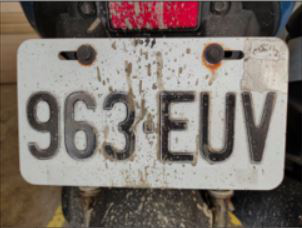

In [18]:
img

In [19]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\khl\AppData\Local\Programs\Tesseract-OCR\tesseract'

In [20]:
text = pytesseract.image_to_string(img)

In [21]:
print(text)

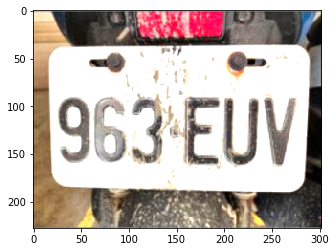

In [22]:
alpha = 1.7
beta = 0
adjusted = cv2.convertScaleAbs(np.float32(img), alpha=alpha, beta=beta)
plt.imshow(adjusted)
plt.show()

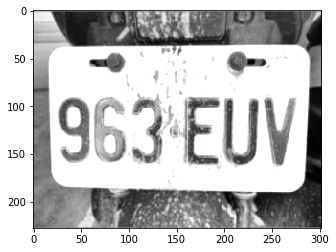

In [23]:
img2 = cv2.cvtColor(adjusted, cv2.COLOR_RGB2GRAY)
plt.imshow(img2, cmap='gray')
plt.show()

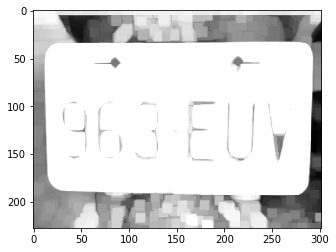

In [24]:
kernel = np.ones((5,5), np.uint8)
binary = cv2.dilate(img2, kernel, iterations=2)
plt.imshow(binary, cmap='gray')
plt.show()

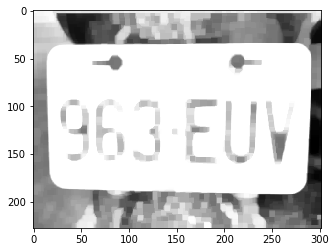

In [25]:
binary = cv2.erode(binary, kernel, iterations=1)
plt.imshow(binary, cmap='gray')
plt.show()

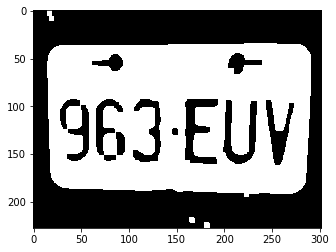

In [26]:
ret, binary = cv2.threshold(binary, 250, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.show()

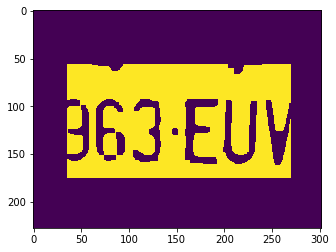

In [27]:
contour, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

copy_img = binary.copy()
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(copy_img, (x,y), (x+w, y+h), (0,255,0), 40)

plt.imshow(copy_img)
plt.show()

In [28]:
cnt = max(contour, key=len)
x,y,w,h = cv2.boundingRect(cnt)
print(x, y, w, h)

15 35 275 161


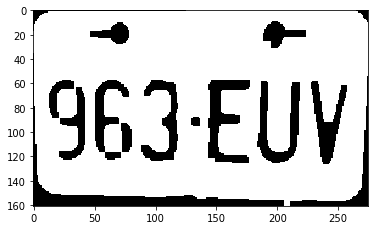

In [29]:
crop_img = binary[y:y+h, x:x+w]
plt.imshow(crop_img, cmap='gray')
plt.show()

In [30]:
crop_x, crop_y = crop_img.shape
print(crop_x, crop_y)

161 275


In [31]:
new_img = cv2.resize(crop_img, (int(crop_y/5), int(crop_x/5)))

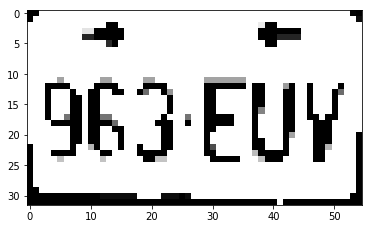

In [32]:
plt.imshow(new_img, cmap='gray')

In [33]:
text = pytesseract.image_to_string(crop_img)

In [34]:
print(text)

963 EUV

